# Import Library's
We will use pandas to process and read our banking dataset. 

In [146]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/churn-modeling-4/Churn_Modeling_3-2.csv
/kaggle/input/churndata2/Churn_Modeling_2.csv
/kaggle/input/banking-clean/Churn_Modelling.csv


# Examining the Data
I'll use python and use the commands data.head, data.describe and data.info to basic statistics in the first few rows of the dataset. This will give me a good idea of the types of data and Column names I am going to be working with. 

In [147]:
data = pd.read_csv('/kaggle/input/banking-clean/Churn_Modelling.csv')
data.head()
data.describe()
data.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10002 non-null  int64  
 1   Surname          10002 non-null  object 
 2   CreditScore      10002 non-null  int64  
 3   Geography        10001 non-null  object 
 4   Gender           10002 non-null  object 
 5   Age              10001 non-null  float64
 6   Tenure           10002 non-null  int64  
 7   Balance          10002 non-null  float64
 8   NumOfProducts    10002 non-null  int64  
 9   HasCrCard        10001 non-null  float64
 10  IsActiveMember   10001 non-null  float64
 11  EstimatedSalary  10002 non-null  float64
 12  Exited           10002 non-null  int64  
dtypes: float64(5), int64(5), object(3)
memory usage: 1016.0+ KB


# Identify Missing Values
To check for missing values, I will use the data.isnull command to show the total missing values of each column. Ill also add the data.info to show what the datatype is that has missing values. 

In [148]:
print(data.isnull().sum())
data.info()

CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10002 non-null  int64  
 1   Surname          10002 non-null  object 
 2   CreditScore      10002 non-null  int64  
 3   Geography        10001 non-null  object 
 4   Gender           10002 non-null  object 
 5   Age              10001 non-null  float64
 6   Tenure           10002 non-null  int64  
 7   Balance          10002 non-null  float64
 8   NumOfProducts    10002 non-null  int64  
 9   HasCrCard        10001 non-null  float64
 10  IsActiveMember   10001 non-null  float64
 11  Es

# Missing Values by row
I can also help narrow down where the values are missing by row using the following python command. 

In [149]:
print(data[data.isnull().any(axis=1)])

   CustomerId   Surname  CreditScore Geography  Gender   Age  Tenure  \
4    15737888  Mitchell          850     Spain  Female  43.0       2   
6    15592531  Bartlett          822       NaN    Male  50.0       7   
8    15792365        He          501    France    Male  44.0       4   
9    15592389        H?          684    France    Male   NaN       2   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
4  125510.82              1        NaN             1.0         79084.10   
6       0.00              2        1.0             1.0         10062.80   
8  142051.07              2        0.0             NaN         74940.50   
9  134603.88              1        1.0             1.0         71725.73   

   Exited  
4       0  
6       0  
8       0  
9       0  


As we can see we have a strange Surname for Customer ID #15592389, we have a few missing values under "Country," "Age," "Has Credit Card" and "Is Active Memeber."

# Addressing Missing Values
Here we can go in and address each value. 
1. Although it was not techinically "missing", we will start with replacing the "H?" surname with "Henry."
2. Next we will move onto the missing values by Country. 
    * I will replace the single missing value in with the most commonly used country. 
3. Next we have a missing value in the age column we will replace with the average age of the entire column. 
4. To address the missing value in "HasCrCard" and "IsActiveMember" we will fill it with the value "Yes"(1) or "No"(0).
5. After all of our Missing values have been addressed, we need to verify the changes prior to moving to the next step in the Data cleaning process. 

In [150]:
#Replacing the "H?" with "Henry"
data['Surname'].replace('H?', 'Henry', inplace=True)


/tmp/ipykernel_30/2563861737.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Surname'].replace('H?', 'Henry', inplace=True)


In [151]:
#Replacing the missing values in Geography with the most commonly used Country.
data['Geography'].fillna(data['Geography'].mode()[0], inplace=True)

/tmp/ipykernel_30/833773543.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Geography'].fillna(data['Geography'].mode()[0], inplace=True)


In [152]:
#Replacing the missing value in "Age" with the average age of the entire column. 
data['Age'].fillna(data['Age'].mean(), inplace=True)


/tmp/ipykernel_30/4001107021.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(), inplace=True)


In [153]:
# Replace missing values with 1 (Yes)
data['HasCrCard'].fillna(1, inplace=True)

/tmp/ipykernel_30/256288808.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['HasCrCard'].fillna(1, inplace=True)


In [154]:
# Replace missing values with 0 (No)
data['HasCrCard'].fillna(0, inplace=True)

/tmp/ipykernel_30/4041130040.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['HasCrCard'].fillna(0, inplace=True)


In [155]:
# Replace missing values with 1 (Yes)
data['IsActiveMember'].fillna(1, inplace=True)  

/tmp/ipykernel_30/152668195.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['IsActiveMember'].fillna(1, inplace=True)


In [156]:
# Replace missing values with 0 (No)
data['IsActiveMember'].fillna(0, inplace=True)  

/tmp/ipykernel_30/1279710514.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['IsActiveMember'].fillna(0, inplace=True)


In [157]:
#To verify our missing values have been handled we are going to run the print command to ensure they have been handled. 
print(data.isnull().sum())

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [158]:
# Display DataFrame after filling missing values
print("\nDataFrame After Filling Missing Values:\n", data)


DataFrame After Filling Missing Values:
        CustomerId    Surname  CreditScore Geography  Gender   Age  Tenure  \
0        15634602   Hargrave          619    France  Female  42.0       2   
1        15647311       Hill          608     Spain  Female  41.0       1   
2        15619304       Onio          502    France  Female  42.0       8   
3        15701354       Boni          699    France  Female  39.0       1   
4        15737888   Mitchell          850     Spain  Female  43.0       2   
...           ...        ...          ...       ...     ...   ...     ...   
9997     15584532        Liu          709    France  Female  36.0       7   
9998     15682355  Sabbatini          772   Germany    Male  42.0       3   
9999     15682355  Sabbatini          772   Germany    Male  42.0       3   
10000    15628319     Walker          792    France  Female  28.0       4   
10001    15628319     Walker          792    France  Female  28.0       4   

         Balance  NumOfProducts  

In [159]:
# Save the DataFrame as a CSV file
data.to_csv('Churn_Modeling_2.csv', index=False)
print("Data has been cleaned and saved successfully!")

Data has been cleaned and saved successfully!


# Identifying and Handling Outliers: 

I will start with addressing numerical outliers on the following columns:
CreditScore:
Outliers might indicate customers with unusually low or high creditworthiness.

Age:
Outliers could indicate very young or very old customers. I will take into consideration which age groups I would want to include. 

Tenure:
Outliers may not always indicate an issue. Tenure should be analyzed based on business context.

Balance:
High outliers could be wealthy clients, but extremely low negative balances might indicate errors.

NumOfProducts:
If some customers have unusually high numbers of products, it might be useful to keep those data points.

EstimatedSalary:
High salary outliers could represent high-net-worth individuals. 



# Identify Outliers Using the Interquartile Range (IQR) Method

I will be using the IQR method to identify my numerical outliers. The IQR identifies outliers based on the range between the first quartile (Q1) and third quartile (Q3).

Formula for IQR:

	•	IQR = Q3 - Q1
	•	Lower Bound = Q1 - 1.5 * IQR
	•	Upper Bound = Q3 + 1.5 * IQR

Any data points outside these bounds are considered outliers.

In [160]:
import pandas as pd
data = pd.read_csv('/kaggle/input/churndata2/Churn_Modeling_2.csv')

# List of numerical columns to check for outliers
numeric_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Detect outliers using IQR method for each numerical column
for column in numeric_columns:
    Q1 = data[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = data[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    print(f"Column: {column}")
    print(f"Number of outliers: {outliers.shape[0]}")
    print(outliers[[column]])  # Display outlier values
    print("----" * 10)

Column: CreditScore
Number of outliers: 15
      CreditScore
7             376
942           376
1193          363
1405          359
1631          350
1838          350
1962          358
2473          351
2579          365
8154          367
8723          350
8762          350
9210          382
9356          373
9624          350
----------------------------------------
Column: Age
Number of outliers: 359
       Age
58    66.0
85    75.0
104   65.0
158   73.0
181   65.0
...    ...
9753  68.0
9765  64.0
9832  64.0
9894  77.0
9936  77.0

[359 rows x 1 columns]
----------------------------------------
Column: Tenure
Number of outliers: 0
Empty DataFrame
Columns: [Tenure]
Index: []
----------------------------------------
Column: Balance
Number of outliers: 0
Empty DataFrame
Columns: [Balance]
Index: []
----------------------------------------
Column: NumOfProducts
Number of outliers: 60
      NumOfProducts
7                 4
70                4
1254              4
1469              4
1488

For an additional examination of the outliers, I wanted to see the top highest and lowest outliers for each column. 

In [161]:
def view_top_outliers(df):
    # Identify numerical columns
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

    # Loop through each numerical column
    for column in numerical_columns:
        # Calculate Q1, Q3, and IQR
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter to identify outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

        # Display top 10 lowest and highest outliers for each column
        if not outliers.empty:
            print(f"Top 10 Lowest Outliers for {column}:")
            print(outliers.nsmallest(10, column)[[column]], "\n")

            print(f"Top 10 Highest Outliers for {column}:")
            print(outliers.nlargest(10, column)[[column]], "\n")
            print("-" * 40)

# Step 2: Call the function on the DataFrame
view_top_outliers(data)

Top 10 Lowest Outliers for CreditScore:
      CreditScore
1631          350
1838          350
8723          350
8762          350
9624          350
2473          351
1962          358
1405          359
1193          363
2579          365 

Top 10 Highest Outliers for CreditScore:
      CreditScore
9210          382
7             376
942           376
9356          373
8154          367
2579          365
1193          363
1405          359
1962          358
2473          351 

----------------------------------------
Top 10 Lowest Outliers for Age:
       Age
567   63.0
769   63.0
963   63.0
1235  63.0
1285  63.0
2053  63.0
2078  63.0
2459  63.0
2615  63.0
2926  63.0 

Top 10 Highest Outliers for Age:
       Age
6443  92.0
6759  92.0
2458  88.0
3033  85.0
3387  84.0
3531  84.0
9309  83.0
766   82.0
4931  81.0
7526  81.0 

----------------------------------------
Top 10 Lowest Outliers for NumOfProducts:
      NumOfProducts
7                 4
70                4
1254              4
1469

# Removing Numerical Outliers
I have decided to remove unrealistically low credit scores. 

In [162]:
data_cleaned = data[(data['CreditScore'] >= lower_bound) & (data['CreditScore'] <= upper_bound)]

# Step 3: View the cleaned DataFrame
print("Original DataFrame:\n", data)
print("\nDataFrame after removing CreditScore outliers:\n", data_cleaned)

# Save the DataFrame as a CSV file
data.to_csv('Churn_Modeling_3.csv', index=False)
print("Data has been cleaned and saved successfully!")

Original DataFrame:
        CustomerId    Surname  CreditScore Geography  Gender   Age  Tenure  \
0        15634602   Hargrave          619    France  Female  42.0       2   
1        15647311       Hill          608     Spain  Female  41.0       1   
2        15619304       Onio          502    France  Female  42.0       8   
3        15701354       Boni          699    France  Female  39.0       1   
4        15737888   Mitchell          850     Spain  Female  43.0       2   
...           ...        ...          ...       ...     ...   ...     ...   
9997     15584532        Liu          709    France  Female  36.0       7   
9998     15682355  Sabbatini          772   Germany    Male  42.0       3   
9999     15682355  Sabbatini          772   Germany    Male  42.0       3   
10000    15628319     Walker          792    France  Female  28.0       4   
10001    15628319     Walker          792    France  Female  28.0       4   

         Balance  NumOfProducts  HasCrCard  IsActiveMe

In [163]:
#Again lets double check and make sure our values have been handled properly after the save. 
import pandas as pd
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [164]:
#Now I am going to use IQR to remove those credit score outliers. 
import pandas as pd

# Load your dataset (replace 'your_dataset.csv' with your actual file name)
data = pd.read_csv('/kaggle/input/churn-modeling-4/Churn_Modeling_3-2.csv')

# Calculate the IQR for the CreditScore column
Q1 = data['CreditScore'].quantile(0.25)  # 25th percentile
Q3 = data['CreditScore'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile Range

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove rows with CreditScore values outside the bounds
data_no_outliers = data[(data['CreditScore'] >= lower_bound) & (data['CreditScore'] <= upper_bound)]

# Print the number of removed outliers
print(f"Number of outliers removed: {len(data) - len(data_no_outliers)}")

Number of outliers removed: 15


In [165]:
# Display the cleaned DataFrame
print("DataFrame after removing outliers from CreditScore column:")
print(data_no_outliers.head())  # Display the first 5 rows of the cleaned DataFrame

DataFrame after removing outliers from CreditScore column:
   CustomerId   Surname  CreditScore Geography  Gender  Age  Tenure  \
0    15634602  Hargrave          619    France  Female   42       2   
1    15647311      Hill          608     Spain  Female   41       1   
2    15619304      Onio          502    France  Female   42       8   
3    15701354      Boni          699    France  Female   39       1   
4    15737888  Mitchell          850     Spain  Female   43       2   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              1          1               1        101348.88   
1   83807.86              1          0               1        112542.58   
2  159660.80              3          1               0        113931.57   
3       0.00              2          0               0         93826.63   
4  125510.82              1          1               1         79084.10   

   Exited  
0       1  
1       0  
2       1  
3       0  
4  

In [166]:
# Save the cleaned DataFrame to a new CSV file
data.to_csv('Churn_Modeling_3.csv', index=False)

# Print confirmation
print("Cleaned data has been saved to 'cleaned_data_no_outliers.csv'.")

Cleaned data has been saved to 'cleaned_data_no_outliers.csv'.


# Checking for Data Imbalance
I want to check the distribution on Geography and Gender and check how frequently Exited, "IsActiveMember," "HasCrCard," and 

In [167]:
# Check frequency distribution for categorical columns
print(data['Geography'].value_counts())
print(data['Gender'].value_counts())
print("Class distribution in target variable:\n", data_no_outliers['Exited'].value_counts())
print("Class distribution in target variable:\n", data_no_outliers['IsActiveMember'].value_counts())
print("Class distribution in target variable:\n", data_no_outliers['HasCrCard'].value_counts())


Geography
France     5015
Germany    2510
Spain      2477
Name: count, dtype: int64
Gender
Male      5458
Female    4544
Name: count, dtype: int64
Class distribution in target variable:
 Exited
0    7964
1    2023
Name: count, dtype: int64
Class distribution in target variable:
 IsActiveMember
1    5147
0    4840
Name: count, dtype: int64
Class distribution in target variable:
 HasCrCard
1    7044
0    2943
Name: count, dtype: int64


# Final Verification
Before I can move onto using my cleaned dataset, I am going to verify our outliers and missing values have been handled

In [168]:
print("Final cleaned data summary:")
print(data_no_outliers.info())
print("\nMissing values:\n", data_no_outliers.isnull().sum())

Final cleaned data summary:
<class 'pandas.core.frame.DataFrame'>
Index: 9987 entries, 0 to 10001
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       9987 non-null   int64  
 1   Surname          9987 non-null   object 
 2   CreditScore      9987 non-null   int64  
 3   Geography        9987 non-null   object 
 4   Gender           9987 non-null   object 
 5   Age              9987 non-null   int64  
 6   Tenure           9987 non-null   int64  
 7   Balance          9987 non-null   float64
 8   NumOfProducts    9987 non-null   int64  
 9   HasCrCard        9987 non-null   int64  
 10  IsActiveMember   9987 non-null   int64  
 11  EstimatedSalary  9987 non-null   float64
 12  Exited           9987 non-null   int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB
None

Missing values:
 CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender    

In [169]:
#One last save before exporting my dataset. 
#Hope this helped and if you have any suggestions feel free to let me know. 
# Save the cleaned DataFrame to a new CSV file
data.to_csv('Final_Cleaned_Banking_Dataset.csv', index=False)

# Print confirmation
print("Cleaned data has been saved to 'cleaned_data_no_outliers.csv'.")

Cleaned data has been saved to 'cleaned_data_no_outliers.csv'.


# Visualizations
We will make the following vizualizations to showcase our dataset: 
* A histogram of Credit scores.
* A bar graph of Exited customers based on Geographical location (France, Germany and Spain)
* The main goal of this dataset is to gather information on retaining customers, so we will add a boxplot of customers exited based on their balance. 
* A heat map to show the relationships between numerical features, helping to identify highly correlated features.
* A pair plot to see the relationship between pairs of numerical columns. 
* A scatter plot to explore the relationship between Tenure and Estimated Salary to see if tenure impacts income.
* A Bar plot of products owned by exited customers to see how the number of products affects customer churn. 
* A grouped bar chart to show the average credit score by geography and split by gender. 
* A histogram to show the distribution of customer ages that help identify age groups.

In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


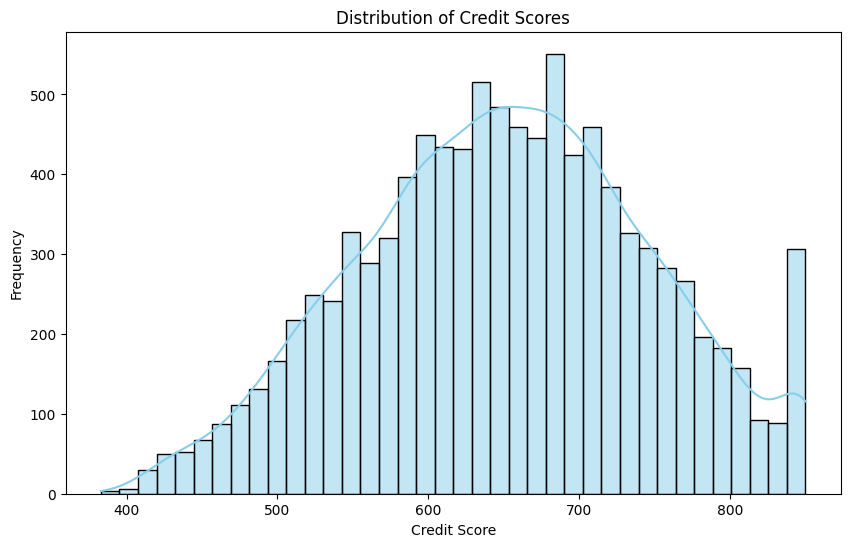

In [171]:
# Histogram of Credit Scores
plt.figure(figsize=(10, 6))
sns.histplot(data=data_no_outliers, x='CreditScore', kde=True, color='skyblue')
plt.title('Distribution of Credit Scores')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

Insights:

Normal Distribution Shape:

• The distribution of credit scores is approximately bell-shaped, indicating a normal distribution centered around 650-700.

Most Common Credit Score Range:

• The peak frequency is around 650-700, with the highest number of customers having credit scores in this range. This suggests that most customers have average credit scores.

Lower Frequency for Extreme Values:

• There is a much lower frequency of customers with very low (below 400) or high (above 800) credit scores, as shown by the steep drop-offs at both ends of the histogram.

Right Tail Outliers:

• There is an unexpected spike around 850, which might indicate a small number of customers with extremely high credit scores. This spike might be worth investigating to see if these customers have unique characteristics.

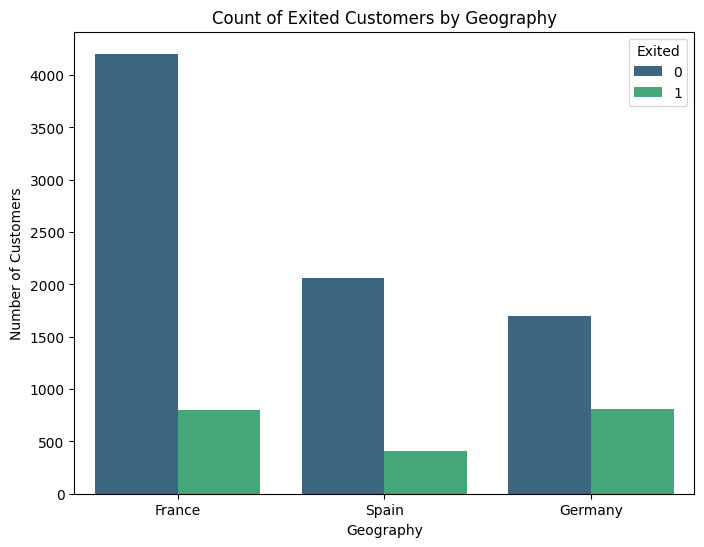

In [172]:
# Count of Exited Customers by Geography
plt.figure(figsize=(8, 6))
sns.countplot(data=data_no_outliers, x='Geography', hue='Exited', palette='viridis')
plt.title('Count of Exited Customers by Geography')
plt.xlabel('Geography')
plt.ylabel('Number of Customers')
plt.legend(title='Exited', loc='upper right')
plt.show()

Insights: 

France Has the Most Exited Customers:

•France has the highest count of customers who have exited the bank, significantly higher than Spain or Germany. The number of customers who exited in France is around 900, compared to Spain and Germany, which have fewer exits.

Spain and Germany Have Similar Exits:

•The number of exited customers in Spain and Germany is relatively similar. Both countries have lower absolute counts of exited customers compared to France.

France Also Has the Largest Customer Base:

• The total number of customers in France (including both exited and non-exited) is much higher than in Spain and Germany, suggesting that France might be the bank’s primary market. However, despite having a larger customer base, France still shows a relatively higher churn count.

Geography Might Be a Factor in Churn:

• The higher churn in France could be due to cultural differences, service issues, or product-market fit in that region. Investigating further into why customers from France are exiting at a higher rate might be worthwhile.

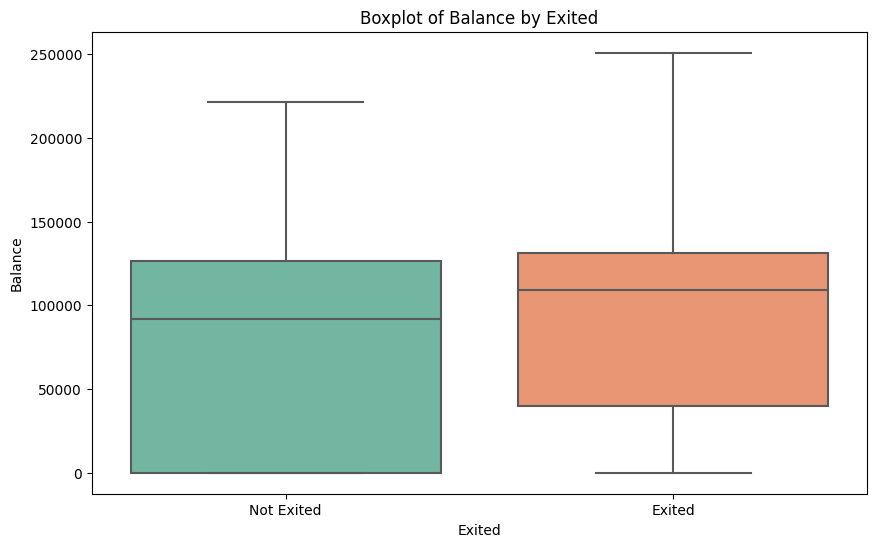

In [173]:
# Boxplot of Balance grouped by Exited
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_no_outliers, x='Exited', y='Balance', palette='Set2')
plt.title('Boxplot of Balance by Exited')
plt.xlabel('Exited')
plt.ylabel('Balance')
plt.xticks([0, 1], ['Not Exited', 'Exited'])  # Rename x-axis labels
plt.show()

Insights: 

Higher Median Balance for Exited Customers:

• The median balance for exited customers is much higher than for non-exited customers. 

* The median balance for Exited customers is around $140,000, while for Not Exited customers, it is approximately $75,000.


Wider Spread for Exited Customers:

• The interquartile range (IQR) (height of the box) for exited customers is wider compared to non-exited customers. This indicates that exited customers tend to have a more diverse range of balances.

Non-Exited Customers Tend to Have Lower Balances:

• The majority of non-exited customers have a lower overall balance. The boxplot shows that many of these customers have balances clustered towards the lower range, indicating that customers with lower balances might be more likely to stay with the bank.

Potential Indicator of Satisfaction:

• The fact that customers with higher balances tend to exit suggests a potential dissatisfaction with the bank’s services despite holding large amounts in their accounts. These customers might have higher expectations that are not being met

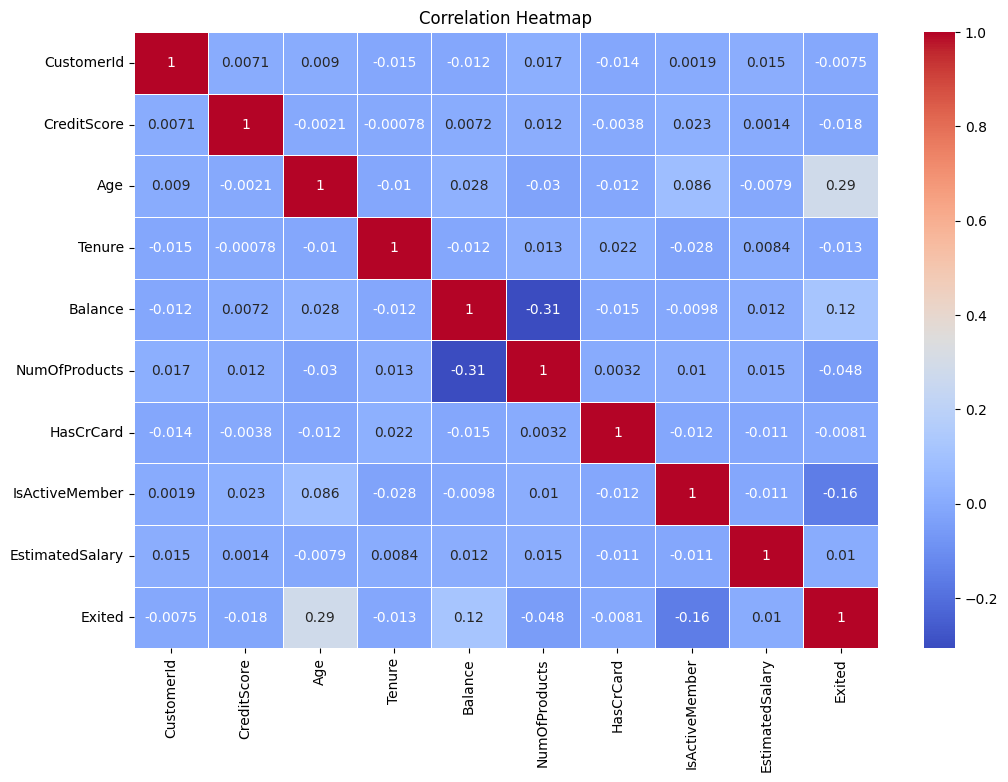

In [175]:
# Step 1: Select only numeric columns for the heatmap
numeric_columns = data_no_outliers.select_dtypes(include=['int64', 'float64']).columns
data_numeric = data_no_outliers[numeric_columns]

# Step 2: Create the heatmap with the filtered numeric data
plt.figure(figsize=(12, 8))
sns.heatmap(data_numeric.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Insights: 
Age vs. Exited (0.29):

 • Age has the highest positive correlation with Exited at 0.29. This indicates that as age increases, the likelihood of a customer exiting tends to increase. Although the correlation is moderate, it is the strongest among the features in the dataset.

Balance vs. Exited (0.12):

• Balance has a positive correlation of 0.12 with Exited, indicating that customers with higher balances are slightly more likely to exit. While this correlation is weaker, it still suggests that Balance might play a role in customer churn.

IsActiveMember vs. Exited (-0.16):

•IsActiveMember has a negative correlation of -0.16 with Exited, meaning that active members are less likely to exit compared to inactive ones.

NumOfProducts vs. Exited (-0.048):
• NumOfProducts has a very weak negative correlation with Exited, suggesting that the number of products might not be a major determinant of churn in this dataset.

CreditScore vs. Exited (-0.018):

• Interestingly, CreditScore has almost no correlation with Exited in this dataset, which may indicate that the bank’s customers leave for reasons unrelated to creditworthiness.


Balance vs. NumOfProducts (-0.31):

• The strongest correlation in the entire matrix is between Balance and NumOfProducts at -0.31. This negative correlation suggests that customers with higher balances tend to have fewer products and vice-versa. This might be an indication that high-balance customers prefer simplicity in their banking products.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

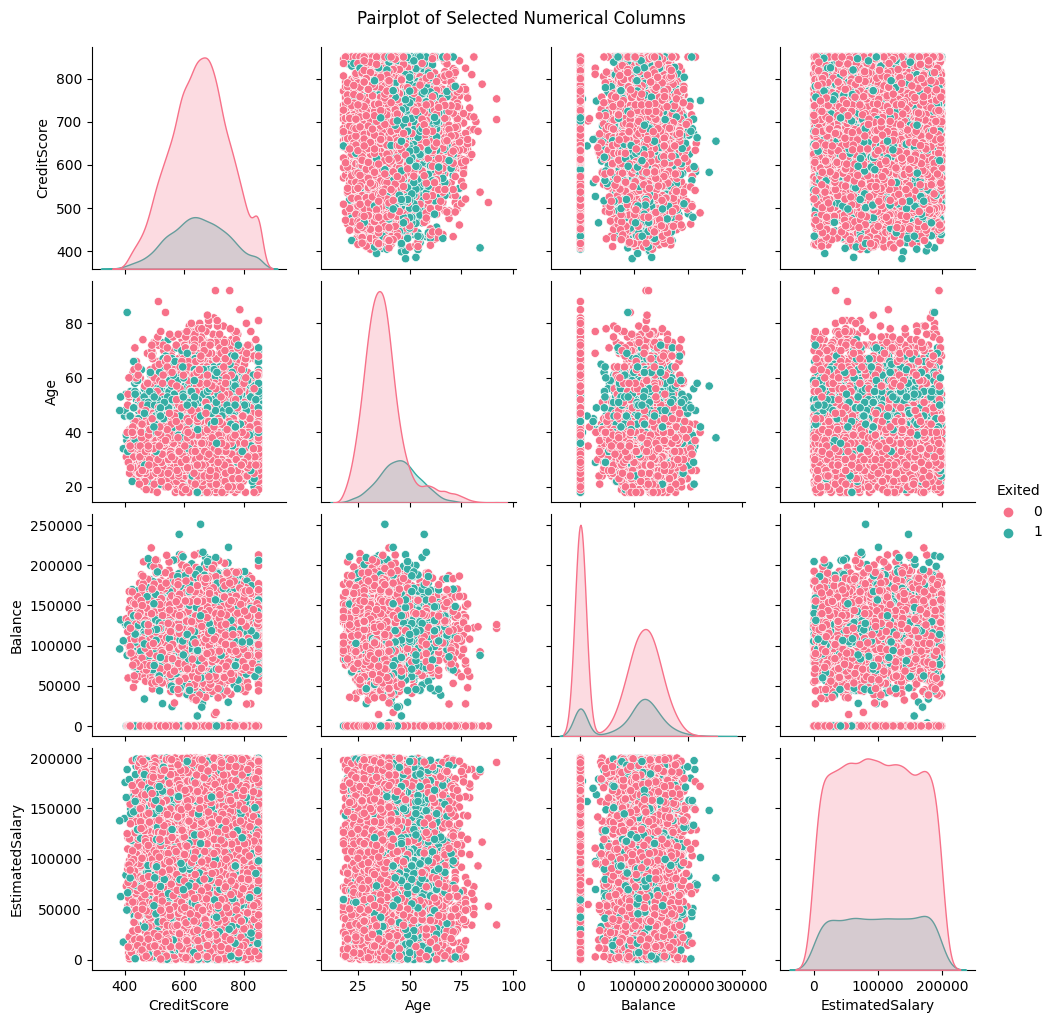

In [176]:
# Pairplot for selected numerical columns
sns.pairplot(data_no_outliers[['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Exited']], hue='Exited', palette='husl')
plt.suptitle('Pairplot of Selected Numerical Columns', y=1.02)
plt.show()

Credit Score vs. Churn (Exited):

• The distribution of Credit Scores seems slightly higher for customers who did not exit (grey), with most scores clustering around 650-750.
• Customers who exited (teal points) seem to have a more even spread across the credit score range, suggesting that Credit Score alone may not be a strong predictor of churn.

Age vs. Churn:

* There is a clear separation between exited and non-exited customers around the Age variable.

Customers aged 40+ appear more likely to churn (Exited = 1), while younger customers tend to stay (Exited = 0).

Balance vs. Churn:
• The Balance variable reveals an interesting pattern. Many customers have a balance of zero, but there’s a large number of exited customers at higher balance values.
• This suggests that customers with higher balances are more likely to churn, indicating potential dissatisfaction despite higher account balances.

Estimated Salary vs. Churn:
• There seems to be no clear pattern between Estimated Salary and Exited status, as churn is uniformly distributed across all salary levels.
• This suggests that Estimated Salary may not play a significant role in predicting churn.


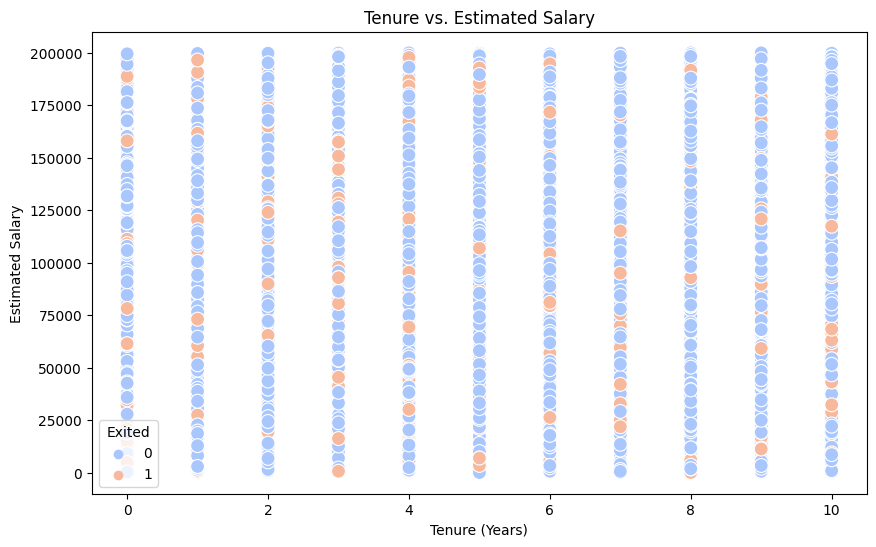

In [185]:
# Scatter plot of Tenure vs. Estimated Salary
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_no_outliers, x='Tenure', y='EstimatedSalary', hue='Exited', s=100, palette='coolwarm')
plt.title('Tenure vs. Estimated Salary')
plt.xlabel('Tenure (Years)')
plt.ylabel('Estimated Salary')
plt.legend(title='Exited')
plt.show()

**Insights:**

Uniform Distribution of Estimated Salary Across Tenure:
* The estimated salary appears to be evenly distributed across all tenure values, with no clear trend indicating a relationship between Tenure and Estimated Salary.

No Clear Separation for Exited vs. Not Exited:

• There is no obvious clustering or separation between customers who have exited (Exited = 1) and those who haven’t (Exited = 0). The orange and blue points are interspersed throughout, suggesting that tenure and salary might not be strong predictors of customer churn in isolation.

Tenure Groups:
• Each distinct value of Tenure (0 through 10 years) has a column of data points with similar distributions, indicating no particular salary or tenure range that seems to drive churn.


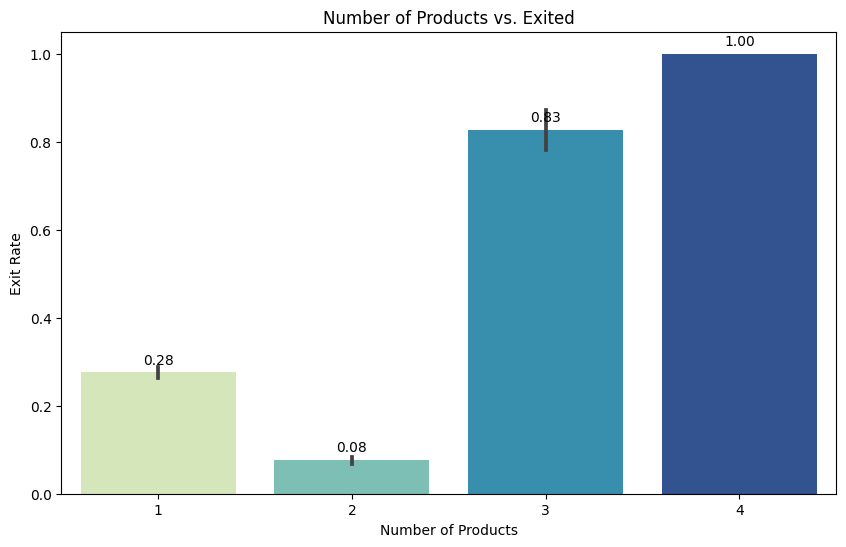

In [182]:
# Bar plot of NumOfProducts vs. Exited
import matplotlib.pyplot as plt
import seaborn as sns

# Create the barplot and assign it to ax
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=data_no_outliers, x='NumOfProducts', y='Exited', palette='YlGnBu')
plt.title('Number of Products vs. Exited')
plt.xlabel('Number of Products')
plt.ylabel('Exit Rate')

# Add data labels to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),  # Format the label to 2 decimal places
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9),  # Offset the label by 9 points
                textcoords = 'offset points')

plt.show()

Analysis
1.Number of Products = 1:
•Exit Rate: 0.28 (28% of customers with 1 product exited).

2.Number of Products = 2:
•Exit Rate: 0.08 (8% of customers with 2 products exited).

3.Number of Products = 3:
•Exit Rate: 0.83 (83% of customers with 3 products exited).

4.Number of Products = 4:
•Exit Rate: 1.00 (100% of customers with 4 products exited).

Insights:

Higher Number of Products Correlates with a Higher Exit Rate: 
* As seen from the chart, customers who have 3 or more products are significantly more likely to exit. 
* This could indicate that adding more products doesn’t always increase customer loyalty — in fact, it may lead to dissatisfaction or complexity, causing them to leave.

Sharp Increase from 2 to 3 Products: 
* The jump from an exit rate of 8% for 2 products to 83% for 3 products is significant. 
* It suggests that having more than 2 products could be a tipping point where customers become less satisfied.

Customers with 4 Products Always Exit: 
* Every customer who had 4 products decided to leave the bank, indicating a serious issue that warrants further investigation.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


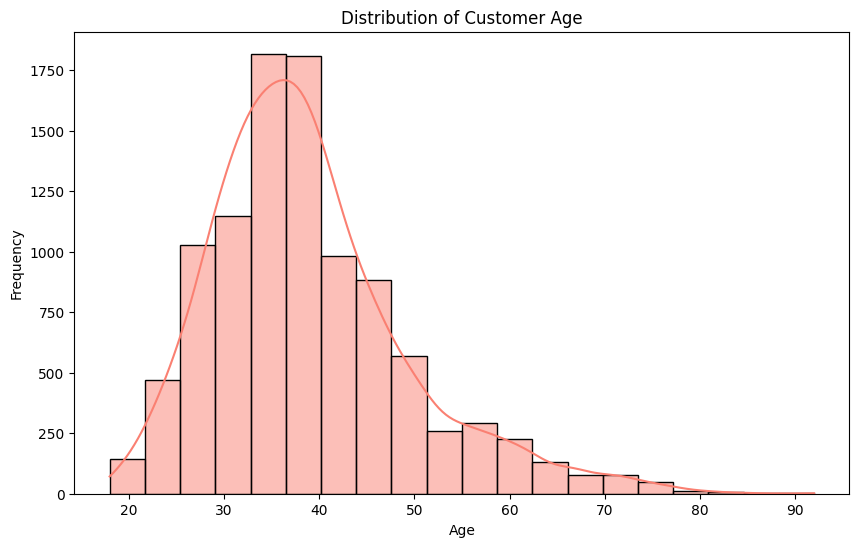

In [183]:
# Histogram for Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=data_no_outliers, x='Age', bins=20, kde=True, color='salmon')
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Interpretation:
1. The histogram indicates that the largest group of customers falls in the age range of 30-40 years, with the highest frequency around 35-40 years.
2. The distribution appears to be slightly right-skewed, with the bulk of customers aged between 30 and 50.

3. Young Customers (<30): There are relatively fewer younger customers (<30 years old).

4. Older Customers (>50): The frequency of customers decreases sharply beyond the age of 50.

Potential Insights:

1. Marketing Strategy:
• If your goal is to attract younger customers, consider strategies that cater to the <30 age group, as this demographic is underrepresented.

2. Retention Strategy:
• Customers in the 35-45 age range are your largest segment.
* Understanding their needs and preferences could be key for retention and product strategies.

3. Focus on Older Demographics:
• The low frequency of older customers (>60) suggests that the bank may not be catering effectively to retirees or older customers. 
* Specialized products and services could be considered.


/tmp/ipykernel_30/2833092635.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_outliers['AgeGroup'] = pd.cut(data_no_outliers['Age'], bins=bins, labels=labels)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observe

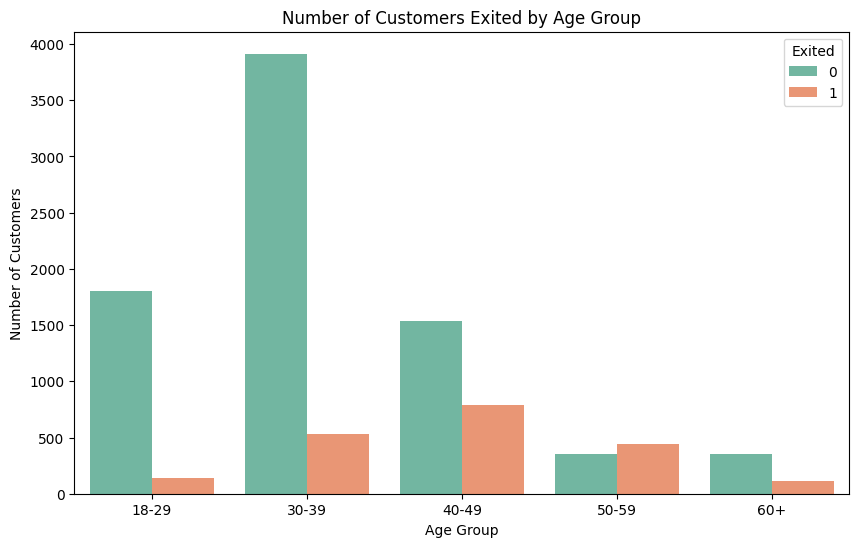

In [184]:
# For further insight into the age groups we can group them into bins
# and create a bar graph.
import matplotlib.pyplot as plt
import seaborn as sns

# Create Age Bins
bins = [18, 30, 40, 50, 60, 100]
labels = ['18-29', '30-39', '40-49', '50-59', '60+']
data_no_outliers['AgeGroup'] = pd.cut(data_no_outliers['Age'], bins=bins, labels=labels)

# Countplot for Age Group and Exited
plt.figure(figsize=(10, 6))
sns.countplot(data=data_no_outliers, x='AgeGroup', hue='Exited', palette='Set2')
plt.title('Number of Customers Exited by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.legend(title='Exited')
plt.show()

Insights:
• 30-39 Age Group: The highest number of customers fall into this category, and while most stay, there is a notable portion of exits. This group has a moderate exit rate compared to other age groups.

• 40-49 Age Group: There is a sharp increase in the number of exits compared to the 30-39 group. This age group has a high number of exits relative to its size. This indicates that middle-aged customers might be more prone to leaving.

Low Exit Rate for Young (<30) and Senior Customers (60+):

* Young customers (18-29) and senior customers (60+) have a lower exit rate, suggesting that these customers are either less engaged with multiple products or more satisfied with the bank’s services.